<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [23]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

In [ ]:
# ·      CRIM - per capita crime rate by town
# ·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# ·      INDUS - proportion of non-retail business acres per town.
# ·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# ·      NOX - nitric oxides concentration (parts per 10 million)
# ·      RM - average number of rooms per dwelling
# ·      AGE - proportion of owner-occupied units built prior to 1940
# ·      DIS - weighted distances to five Boston employment centres
# ·      RAD - index of accessibility to radial highways
# ·      TAX - full-value property-tax rate per $10,000
# ·      PTRATIO - pupil-teacher ratio by town
# ·      LSTAT - % lower status of the population
# ·      MEDV - Median value of owner-occupied homes in $1000's

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


# Task 2: Generate Descriptive Statistics and Visualizations

<AxesSubplot:xlabel='MEDV'>

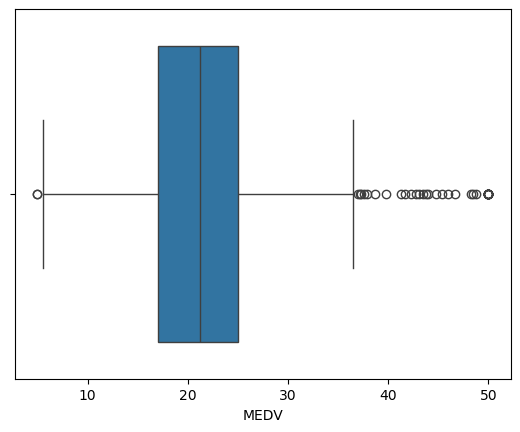

In [9]:
# Median value of owner-occupied homes
sns.boxplot(x=boston_df["MEDV"]) 

<AxesSubplot:xlabel='CHAS', ylabel='count'>

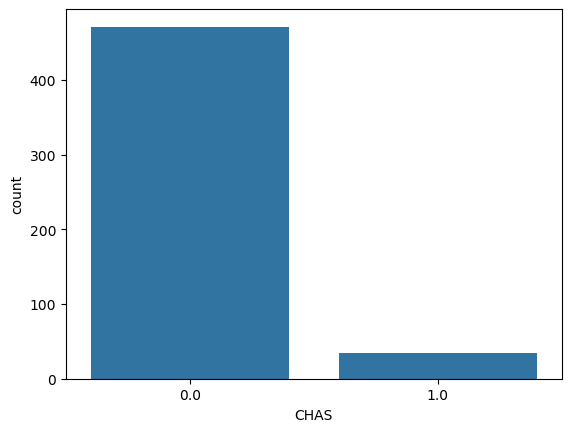

In [11]:
# Provide a  bar plot for the Charles river variable
sns.countplot(x="CHAS", data=boston_df)  

<AxesSubplot:xlabel='AGE_group', ylabel='MEDV'>

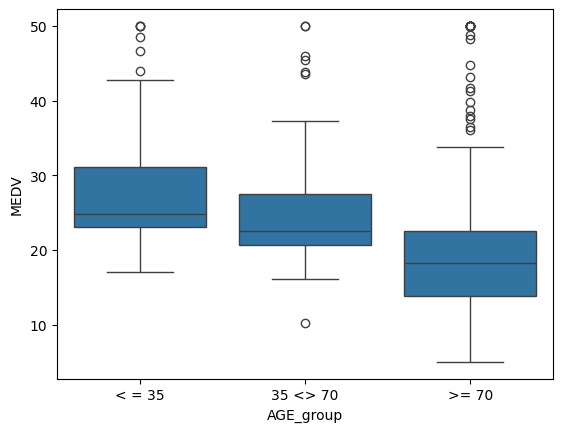

In [14]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

bins = [0, 35, 70, max(boston_df["AGE"])]  
labels = ["< = 35", "35 <> 70", ">= 70"]  
boston_df["AGE_group"] = pd.cut(boston_df["AGE"], bins=bins, labels=labels)  
  
# Create a box plot using Seaborn  
sns.boxplot(x=boston_df["AGE_group"], y=boston_df["MEDV"])

This suggests that areas with a higher proportion of non-retail business acres may have higher levels of pollution due to increased traffic or industrial activity.


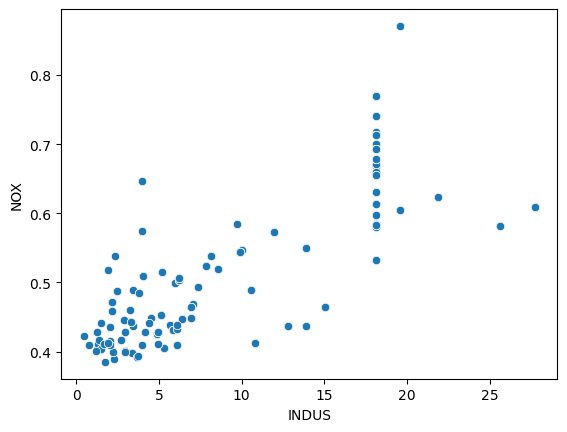

In [16]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
print("This suggests that areas with a higher proportion of non-retail business acres may have higher levels of pollution due to increased traffic or industrial activity.")

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

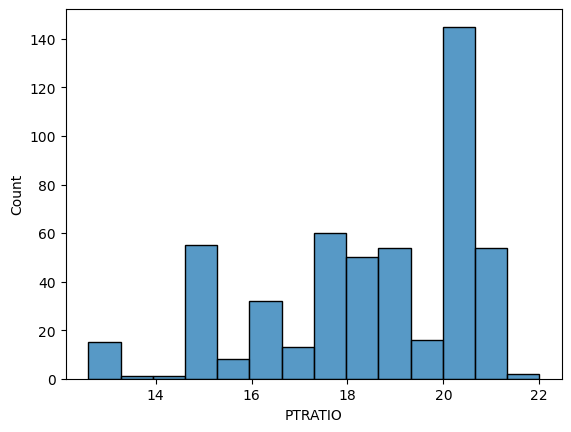

In [17]:
# Create a histogram for the pupil to teacher ratio variable
sns.histplot(data=boston_df, x="PTRATIO")  

# Task 3: Use the appropriate tests to answer the questions provided.

In [ ]:
# Be sure to:
# State your hypothesis.
# Use α = 0.05
# Perform the test Statistics.
# State the conclusion from the test.

In [30]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

print("Hypothesis: There is no significant difference in median value of houses bounded by the Charles river or not.")

# Statistic test
river = boston_df[boston_df["CHAS"] == 1]  
no_river = boston_df[boston_df["CHAS"] == 0]  
  
alpha = 0.05  

t_statistic, p_value = stats.ttest_ind(river["MEDV"], no_river["MEDV"])
print(t_statistic)
print(p_value)

# Conclusion
print(p_value < alpha)
print("Conclusion: P-value is smaller than alpha so we reject the null hypothesis.")

Hypothesis: There is no significant difference in median value of houses bounded by the Charles river or not.
3.996437466090509
7.390623170519905e-05
Conclusion: P-value is smaller than alpha so we reject the null hypothesis.


In [31]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

print("Hypothesis: There is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.")

# Statistic test
age_groups = [boston_df[boston_df["AGE"] <= 35]["MEDV"],  
              boston_df[(boston_df["AGE"] > 35) & (boston_df["AGE"] <= 70)]["MEDV"],  
              boston_df[boston_df["AGE"] > 70]["MEDV"]]

alpha = 0.05

f_statistic, p_value = stats.f_oneway(*age_groups)  
print(t_statistic)
print(p_value)

# Conclusion
print(p_value < alpha)
print("Conclusion: P-value is smaller than alpha so we reject the null hypothesis.")

Hypothesis: There is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.
3.996437466090509
1.7105011022702984e-15
Conclusion: P-value is smaller than alpha so we reject the null hypothesis.


In [33]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

print("Hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")

# Statistic test

alpha = 0.05

correlation, p_value = stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])
print(correlation)
print(p_value)

# Conclusion
print(p_value < alpha)
print("Conclusion: P-value is smaller than alpha so we reject the null hypothesis.")

Hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
0.7636514469209192
7.913361061210442e-98


True

Hypothesis: There is no impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        22:23:45   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      

<ipython-input-39-18ea61259c9f>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(model.pvalues[1])


1.2066117273372235e-08


<ipython-input-39-18ea61259c9f>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(model.pvalues[1] < alpha)


True
Conclusion: P-value is smaller than alpha so we reject the null hypothesis.


<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

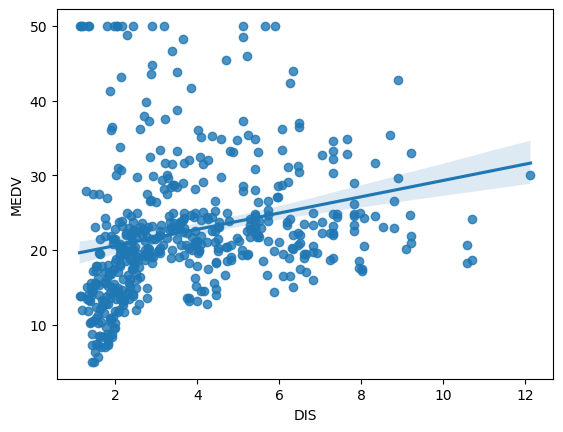

In [39]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
print("Hypothesis: There is no impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.")

# Statistic test

alpha = 0.05
X = boston_df["DIS"]  
y = boston_df["MEDV"] 

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()  
print(model.summary()) 
print(model.pvalues[1])

# Conclusion
print(model.pvalues[1] < alpha)
print("Conclusion: P-value is smaller than alpha so we reject the null hypothesis.")

X = boston_df["DIS"]  
y = boston_df["MEDV"]  
sns.regplot(x=X, y=y)